In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !export LD_LIBRARY_PATH=/home/guilherme/anaconda3/envs/rlgpu/lib
# import isaacgym
# import torch

In [1]:
%env LD_LIBRARY_PATH=/home/guilherme/anaconda3/envs/rlgpu/lib

env: LD_LIBRARY_PATH=/home/guilherme/anaconda3/envs/rlgpu/lib


In [2]:
from typing import Dict, List, Optional, Tuple, Union
from aerial_gym import AERIAL_GYM_ROOT_DIR
from aerial_gym.robot_generator.drone_generator import generate_random_drone
from aerial_gym.robot_generator.models.drone_modules import DroneConfig
from aerial_gym.utils.drone_cfg_plotter import pĺot_drone
from urdfpy import URDF, Inertial, Visual, Collision, Cylinder, Geometry, Link, Material, Sphere, xyz_rpy_to_matrix, Inertial, Joint

AERIAL_GYM_ROOT_DIR /home/guilherme/phd/aerial_gym_simulator
Importing module 'gym_37' (/home/guilherme/phd/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_37.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/guilherme/phd/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json


In [3]:
robot = URDF.load(f"{AERIAL_GYM_ROOT_DIR}/resources/robots/modular/modular_1.urdf")

ValueError: /home/guilherme/phd/aerial_gym_simulator/resources/robots/modular/modular_1.urdf is not a file

In [ ]:
robot.links[0]

Module 0 position: (0.0, 0.0)
Module 1 position: (0.0, 0.16)
Module 2 position: (-0.13856406460551018, 0.08)
Module 3 position: (0.13856406460551018, -0.08)
Module 4 position: (0.13856406460551018, 0.08)
Module 5 position: (-0.27712812921102037, 0.16)


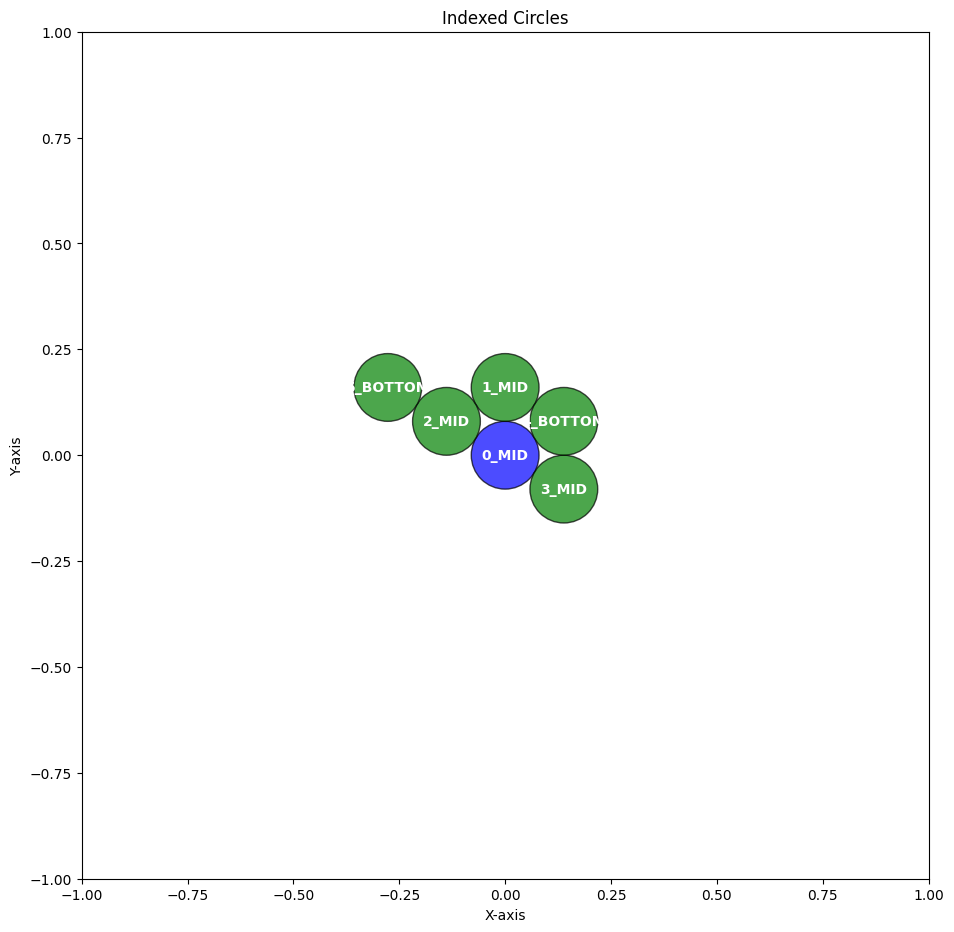

In [54]:
drone = generate_random_drone(num_propellers=5, num_bases=1, allow_unevenness=True)
pĺot_drone(drone)

In [8]:
drone.modules

[DroneModule(id=0, type=<ModuleTypeEnum.BASE: 'BASE'>, connections=DroneConnection(connector_1=None, connector_2=None, connector_3=1, connector_4=None, connector_5=None, connector_6=None), radius=0.08, level=<LevelEnum.MID: 2>, position=(0.0, 0.0)),
 DroneModule(id=1, type=<ModuleTypeEnum.CC_PROPELLER: 'CC_PROPELLER'>, connections=DroneConnection(connector_1=None, connector_2=None, connector_3=2, connector_4=None, connector_5=None, connector_6=0), radius=0.08, level=<LevelEnum.MID: 2>, position=(0.13856406460551018, -0.08)),
 DroneModule(id=2, type=<ModuleTypeEnum.CC_PROPELLER: 'CC_PROPELLER'>, connections=DroneConnection(connector_1=None, connector_2=None, connector_3=None, connector_4=3, connector_5=None, connector_6=1), radius=0.08, level=<LevelEnum.MID: 2>, position=(0.27712812921102037, -0.16)),
 DroneModule(id=3, type=<ModuleTypeEnum.CW_PROPELLER: 'CW_PROPELLER'>, connections=DroneConnection(connector_1=2, connector_2=None, connector_3=4, connector_4=None, connector_5=None, conne

In [11]:
from aerial_gym.robot_generator.drone_generator import generate_modular_drone_urdf

In [13]:
urdf_drone = generate_modular_drone_urdf(num_propellers=5, num_bases=1, allow_unevenness=True)

chosen_connectors: [1, 2]
chosen_connectors: [1, 6]
chosen_connectors: [4, 1]


[autoreload of aerial_gym.robot_generator.drone_generator failed: Traceback (most recent call last):
  File "/home/guilherme/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/guilherme/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/guilherme/miniconda3/envs/rlgpu/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/guilherme/miniconda3/envs/rlgpu/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/guilherme/phd/aerial_gym_simulator/aerial_gym/robot_generator/drone_generator.py", line 308, in <module>

TypeError: dronecfg_to_urdf() missing 1 required positional argument: 'drone'

In [17]:
import urdfpy

def make_directed_edge_indexes(tensor):
    """Converts a tensor of edge indexes into a list of directed edges.

    Args:
        tensor (torch.Tensor): The tensor of edge indexes.

    Returns:
        list: A list of directed edges.
    """
    directed_edges = set()
    for i in range(tensor.size(1)):
        src, dest = tensor[0, i].item(), tensor[1, i].item()
        if src != dest:
            edge = (min(src, dest), max(src, dest))
            directed_edges.add(edge)
    return list(directed_edges)

def dronecfg_to_urdf(name: str, drone: DroneConfig, base_length:float=0.025, propeller_length:float=0.07) -> urdfpy.URDF:
    """Converts a DroneConfig object into a URDF representation of it.
    
    Args:
        drone (DroneConfig): The DroneConfig object to convert.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
    Returns:
        Dict: The URDF representation of the DroneConfig object.
    
    Raises:
        ValueError: If the DroneConfig object is invalid.
    """

    # Check if the DroneConfig object is valid
    if not isinstance(drone, DroneConfig):
        raise ValueError("drone must be a DroneConfig object")
    # Instantiate empty list of links and joints
    links=[]
    joints=[]
    # Add the base and propeller links
    base_links = []
    propeller_links = []
    for module in drone.modules:
        base_link, propeller_link = create_module_links(module, base_length=base_length, propeller_length=propeller_length)
        base_links.append(base_link)
        if propeller_link:
            propeller_links.append(propeller_link)
    links.extend(base_links)
    links.extend(propeller_links)
    # Add the base and propeller joints
    base_joints, propeller_joints = create_joints(drone)
    propeller_joints = [p for p in propeller_joints if p is not None]
    joints.extend(base_joints)
    joints.extend(propeller_joints)
    # Create the URDF object
    return name, links, joints
    robot = urdfpy.URDF(name=name, links=links, joints=joints)
    return robot

In [10]:
from aerial_gym.robot_generator.models.drone_modules import DroneModule, LevelEnum, ModuleTypeEnum
import numpy as np

def get_z_position(module: DroneModule, length: float) -> float:
    """
    Gets the z position of a drone module.
    Args:
        module (DroneModule): The drone module.
        lenght (float): The length of the component.
    Returns:
        float: The z position.
    """
    if module.level == LevelEnum.MID:
        return 0.0
    elif module.level == LevelEnum.TOP:
        return length
    elif module.level == LevelEnum.BOTTOM:
        return -length
    else:
        raise ValueError(f"Invalid level: {module.level}")

def create_module_links(module: DroneModule, base_length = 0.025, propeller_length = 0.07) -> List[Link]:
    """
    Creates the links for a drone module.
    Args:
        module (DroneModule): The drone module.
    Returns:
        Tuple[Link, Link]: The base link and propeller link.
    """
    # Base link setup
    base_name = f"base_link_{module.id}"
    base_visual = Visual(origin=xyz_rpy_to_matrix([0,0,0,0,0,0]), geometry=Geometry(cylinder=Cylinder(radius=module.radius, length=base_length)), material=Material(name="White", color=[1,1,1,1.0]))
    base_link_collision = Collision(name=base_name+"_collision", 
                                    origin=xyz_rpy_to_matrix([0,0,0,0,0,0]),
                                    geometry=Geometry(sphere=Sphere(radius=module.radius)))
    base_link_inertial = Inertial(mass=0.76, inertia=[[0.00243, 0, 0], [0, 0.00243, 0], [0,0, 0.00243]])
    base_link = Link(name=base_name, visuals=[base_visual], collisions=[base_link_collision], inertial=base_link_inertial)
    # Propeller link
    if module.type not in [ModuleTypeEnum.BASE, ModuleTypeEnum.PAYLOAD]:
        propeller_name = f"propeller_link_{module.id}"
        propeller_visual = Visual(origin=xyz_rpy_to_matrix([0,0,0,0,0,0]),geometry=Geometry(cylinder=Cylinder(radius=0.05, length=propeller_length)), material=Material(name="Orange", color=[1, 0.423, 0.03921568627, 1.0]))
        # propeller_link_collision = Collision(name=propeller_name, origin=xyz_rpy_to_matrix(list(module.position)+[get_z_position(module, propeller_length),0,0,0]), geometry=Geometry(sphere=Sphere(radius=module.radius)))
        propeller_link_inertial = Inertial(mass=0.01, inertia=[[0.000001, 0, 0], [0, 0.000001, 0], [0,0, 0.000001]])
        propeller_link = Link(name=propeller_name, visuals=[propeller_visual],
                              collisions=[], 
                              inertial=propeller_link_inertial)
    else:
        propeller_link = None
    return (base_link, propeller_link)
    
def create_joints(drone: DroneConfig, base_length=0.025, propeller_length=0.07) -> Tuple[Joint, Joint]:
    """
    Creates the joints for a drone.
    Args:
        drone (DroneConfig): The drone.
        base_length (float): The length of the base.
        propeller_length (float): The length of the propeller.
    Returns:
        Tuple[Joint, Joint]: The base joint and propeller joint.
    """
    average_length = (base_length + propeller_length) / 2
    directed_edges = make_directed_edge_indexes(drone.edge_index)
    # Create joints
    base_joints = []
    propeller_joints = []
    for i, edge in enumerate(sorted(directed_edges)):
        # # Base joint
        source, target = edge
        base_joint_name = f"base_joint_{i}"
        base_joint = Joint(name=base_joint_name, parent=f"base_link_{source}", child=f"base_link_{target}", joint_type="fixed", origin=xyz_rpy_to_matrix(list(tuple(np.array(drone.modules[target].position)-np.array(drone.modules[source].position)))+[get_z_position(drone.modules[target], average_length),0,0,0]))
        base_joints.append(base_joint)
        # Propeller joint
        if drone.modules[target].type not in [ModuleTypeEnum.BASE, ModuleTypeEnum.PAYLOAD]:
            propeller_joint_name = f"propeller_joint_{i}"
            propeller_joint = Joint(name=propeller_joint_name, parent=f"base_link_{target}", child=f"propeller_link_{target}", joint_type="fixed", origin=xyz_rpy_to_matrix([0]*6))
        else:
            propeller_joint = None
        propeller_joints.append(propeller_joint)
    return base_joints, propeller_joints

In [11]:
name, links, joints = dronecfg_to_urdf(name="quad_modular", drone=drone)

In [12]:
for link in links:
    print(link.name)

base_link_0
base_link_1
base_link_2
base_link_3
base_link_4
base_link_5
propeller_link_1
propeller_link_2
propeller_link_3
propeller_link_4
propeller_link_5


In [13]:
for joint in joints:
    print(joint.name)

base_joint_0
base_joint_1
base_joint_2
base_joint_3
base_joint_4
propeller_joint_0
propeller_joint_1
propeller_joint_2
propeller_joint_3
propeller_joint_4


In [14]:
robot = urdfpy.URDF(name=name, links=links, joints=joints)

In [15]:
robot.save("quad_modular_3.urdf")

In [16]:
# robot.show()

Exception: pyglet 2.0.10 requires Python 3.8 or newer.